In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import default_rng

# Function to draw a random rotation in N dimensions
from scipy.stats import special_ortho_group
from sklearn.datasets import make_swiss_roll, make_s_curve

from itertools import product

import umap

In [2]:
def get_rng(seed_or_rng):
    if isinstance(seed_or_rng, np.random._generator.Generator):
        return seed_or_rng
    else:
        return default_rng(seed=seed_or_rng)

In [3]:
import pickle

# 1. Moebius strip

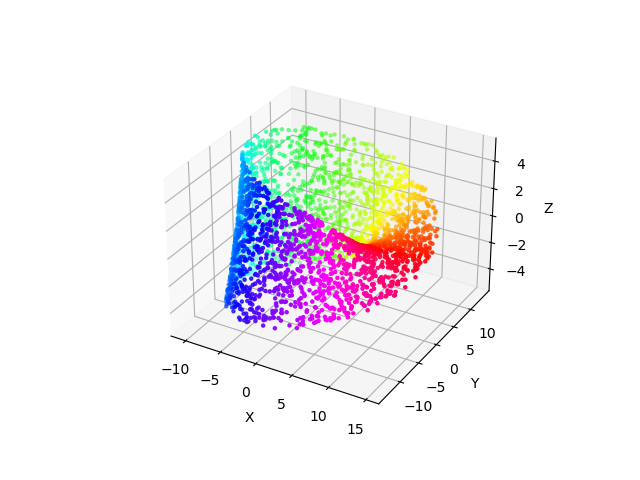

In [4]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

def mobius(u, v):
    u = 2*np.pi*u
    v = 2*v - 1
    
    x = (10 + 10*(v/2)*np.cos(u/2))*np.cos(u)
    y = (10 + 10*(v/2)*np.cos(u/2))*np.sin(u)
    z = 10*(v/2)*np.sin(u/2)
    
    return x,y,z

num_points = 3000

rng = default_rng(33)
u = rng.uniform(size=num_points)
v = rng.uniform(size=num_points)

x, y, z = mobius(u, v)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=5, c=u, cmap="hsv")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [62]:
def get_mobius(points, dims, std=0.1):
    rng = default_rng(33)
    u = rng.uniform(size=num_points)
    v = rng.uniform(size=num_points)

    x, y, z = mobius(u, v)
    
    points = np.zeros((num_points, dims))
    points[:,0] = x
    points[:,1] = y
    points[:,2] = z

    rotation_matrix = special_ortho_group(dim=dims, seed=rng).rvs(1)

    points = np.matmul(points, rotation_matrix)
    
    noise = rng.multivariate_normal(mean=dims*[0], cov=std*np.eye(dims), size=points.shape[0])
    points += noise
    
    
    
    return points, u, v

a, u, v = get_mobius(points=2000, dims=10, std=2)

In [63]:
a, u, v = get_mobius(points=2000, dims=10, std=2)

In [64]:
reducer = umap.UMAP(n_components=3, n_neighbors=30)

emb = reducer.fit_transform(a)

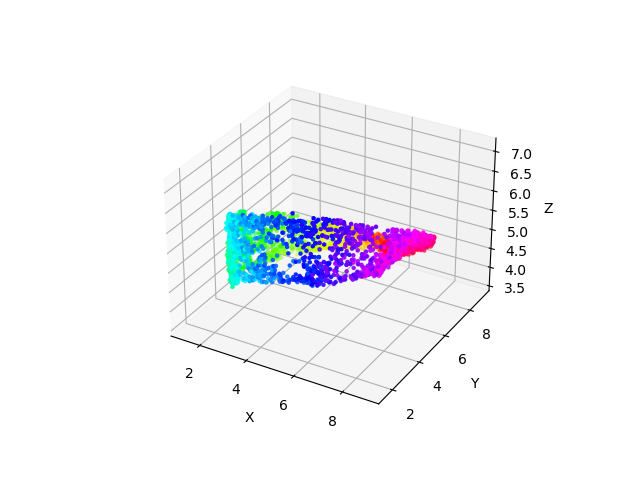

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(emb[:,0], emb[:,1], emb[:,2], s=5, c=u, cmap="hsv")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# 2. Half cylinder

In [4]:
def half_cylinder(u, v, height=5, r=3):
    u = np.pi*u
    v = height*v
    
    x = r * np.cos(u)
    y = r * np.sin(u)
    z = height*v
    
    return x,y,z

def cylinder(u, v, height=5, r=3):
    u = 2*np.pi*u
    v = height*v
    
    x = r * np.cos(u)
    y = r * np.sin(u)
    z = height*v
    
    return x,y,z

In [5]:
def get_half_cylinder(num_points, dims, height=5, r=3, std=0.1, rng=42):
    num_points = int(num_points)
    dims = int(dims)
    if type(rng) is not int:
        try:
            rng = int(rng)
        except:
            pass
    
    rng = default_rng(rng)
    u = rng.uniform(size=num_points)
    v = rng.uniform(size=num_points)

    x, y, z = half_cylinder(u, v, height=height, r=r)
    
    points = np.zeros((num_points, dims))
    points[:,0] = x
    points[:,1] = y
    points[:,2] = z


    
    noise = rng.multivariate_normal(mean=dims*[0], cov=std*np.eye(dims), size=points.shape[0])
    points += noise
    
    rotation_matrix = special_ortho_group(dim=dims, seed=rng).rvs(1)

    points = np.matmul(points, rotation_matrix)
    
    return points, u, v

def get_cylinder(num_points, dims, height=5, r=3, std=0.1, rng=42):
    
    num_points = int(num_points)
    dims = int(dims)
    if type(rng) is not int:
        try:
            rng = int(rng)
        except:
            pass
        
    rng = default_rng(rng)
    u = rng.uniform(size=num_points)
    v = rng.uniform(size=num_points)

    x, y, z = cylinder(u, v, height=height, r=r)
    
    points = np.zeros((num_points, dims))
    points[:,0] = x
    points[:,1] = y
    points[:,2] = z

    
    noise = rng.multivariate_normal(mean=dims*[0], cov=std*np.eye(dims), size=points.shape[0])
    points += noise
    
    rotation_matrix = special_ortho_group(dim=dims, seed=rng).rvs(1)
    points = np.matmul(points, rotation_matrix)
    
    return points, u, v

In [8]:
a, u, v = get_half_cylinder(5000, 3, rng=33)

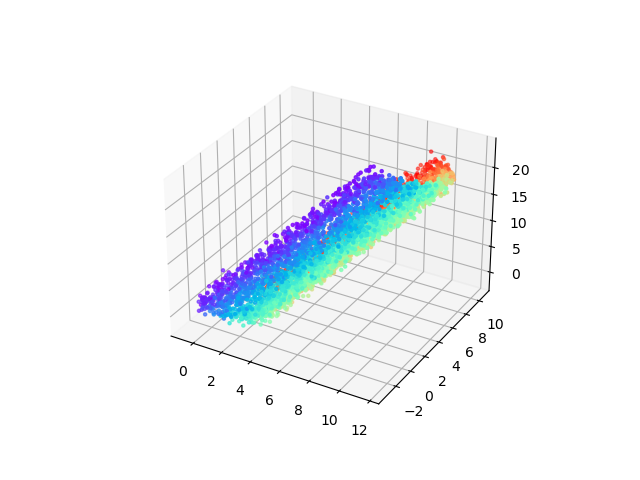

In [10]:
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(a[:,0], a[:,1], a[:,2], s=5, c=u, cmap="rainbow")

plt.show()

In [11]:
a, u, v = get_half_cylinder(5000, 5, rng=33)

reducer = umap.UMAP(n_components=2, n_neighbors=100)

emb = reducer.fit_transform(a)

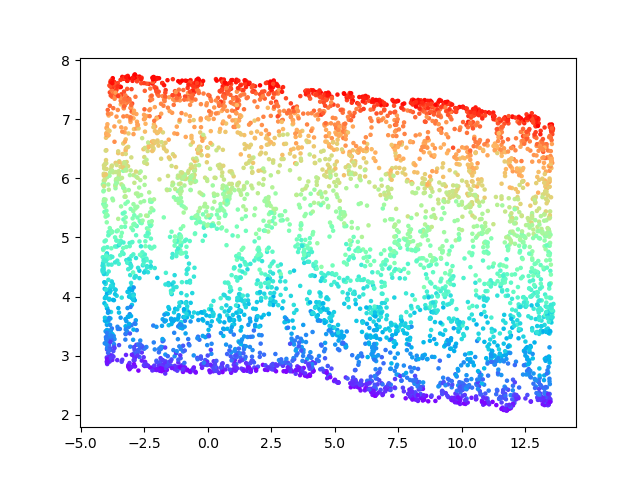

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(emb[:,0], emb[:,1], s=5, c=u, cmap="rainbow")

plt.show()

In [ ]:
reducer = umap.UMAP(n_components=3, n_neighbors=100)

emb = reducer.fit_transform(a)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(emb[:,0], emb[:,1], emb[:,2], s=5, c=u, cmap="rainbow")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [14]:
a, u, v = get_half_cylinder(2000, 3, height=5, r=8, std=1, rng=42)

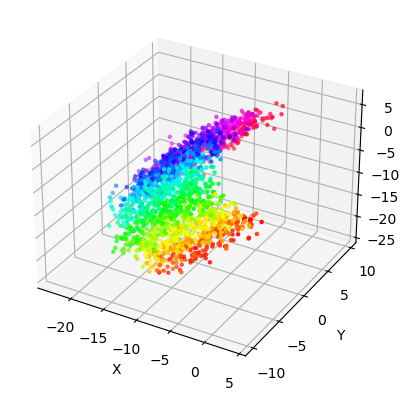

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a[:,0], a[:,1], a[:,2], s=5, c=u, cmap="hsv")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [14]:
NUM_POINTS = [1000, 3000, 10000, 20000]
DIMS = [3, 8, 16]
HEIGHT = [5]
R = [5]
STD = [0.1, 1]
RNG = [33, 1234]

In [18]:
df = pd.DataFrame(columns=["num_points", "dims", "height", "r", "std", "rng"],
                 data=product(NUM_POINTS, DIMS, HEIGHT, R, STD, RNG))
df.to_csv("synth_data_gen/synth_datasets/half_cylinder/params.csv", index=False)

In [19]:
df.shape

(48, 6)

In [20]:
df = pd.read_csv("synth_data_gen/synth_datasets/half_cylinder/params.csv")

for idx in df.index:
    params = df.loc[idx,:].to_dict()
    
    points, u, v = get_half_cylinder(**params)
    
    out = {"data": points, "u": u, "v": v}
    
    with open(f'synth_data_gen/synth_datasets/half_cylinder/set_{idx}.pickle', 'wb') as handle:
        pickle.dump(out, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    #np.save(f"synth_data_gen/synth_datasets_2d/half_cylinder/points_{idx}.npy", points)
    #np.save(f"synth_data_gen/synth_datasets_2d/half_cylinder/u_{idx}.npy", u)
    #np.save(f"synth_data_gen/synth_datasets_2d/half_cylinder/v_{idx}.npy", v)
    

# Cylinder

In [7]:
%matplotlib widget

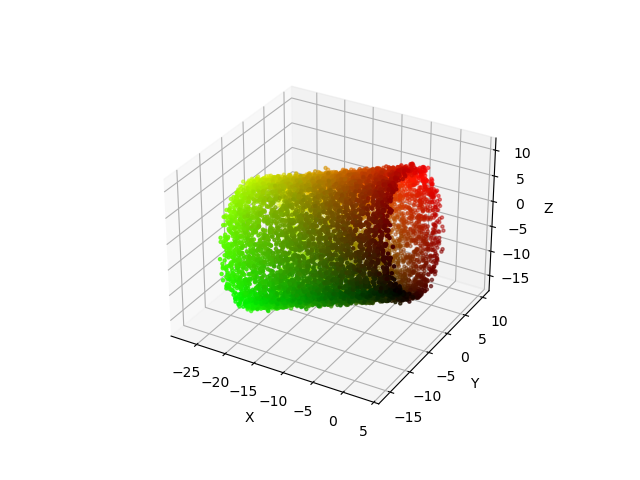

In [8]:
a, u, v = get_cylinder(10000, 3, rng=33, r=10)
cc = np.zeros((u.shape[0], 4))
cc[:,0] = np.max([u, 1-u], axis=0)*2-1
cc[:,1] = v
cc[:,2] = 0
cc[:,3] = 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a[:,0], a[:,1], a[:,2], s=5, c=cc)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

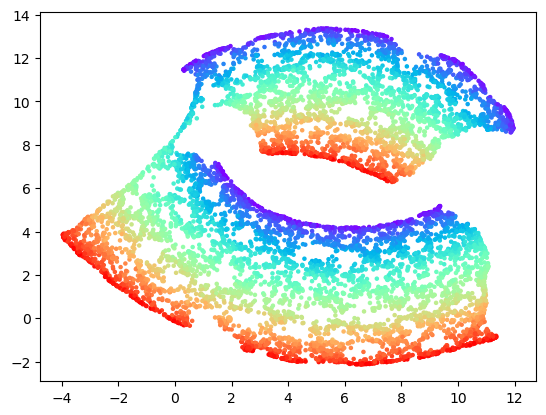

In [15]:
reducer = umap.UMAP(n_components=2, n_neighbors=100)

emb = reducer.fit_transform(a)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(emb[:,0], emb[:,1], s=5, c=v, cmap="rainbow")

plt.show()

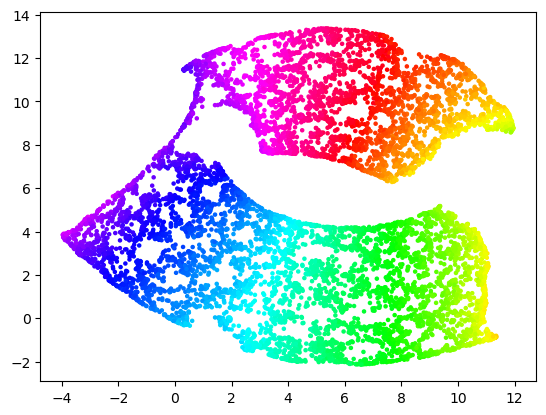

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(emb[:,0], emb[:,1], s=5, c=u, cmap="hsv")

plt.show()

In [17]:
reducer = umap.UMAP(n_components=3, n_neighbors=100)

emb = reducer.fit_transform(a)

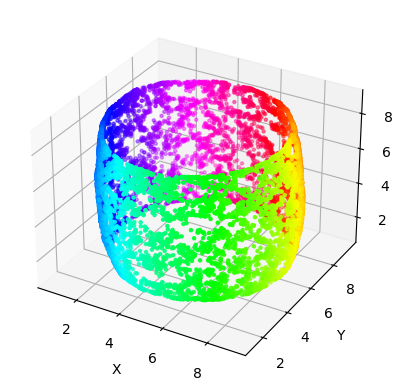

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(emb[:,0], emb[:,1], emb[:,2], s=5, c=u, cmap="hsv")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [19]:
NUM_POINTS = [1000, 3000, 10000, 20000]
DIMS = [3, 8, 16]
HEIGHT = [5]
R = [5]
STD = [0.1, 1]
RNG = [33, 1234]

In [20]:
df = pd.DataFrame(columns=["num_points", "dims", "height", "r", "std", "rng"],
                 data=product(NUM_POINTS, DIMS, HEIGHT, R, STD, RNG))
df.to_csv("synth_data_gen/synth_datasets/cylinder/params.csv", index=False)

In [21]:
df = pd.read_csv("synth_data_gen/synth_datasets/cylinder/params.csv")

for idx in df.index:
    params = df.loc[idx,:].to_dict()
    
    points, u, v = get_cylinder(**params)
    out = {"data": points, "u": u, "v": v}
    
    with open(f'synth_data_gen/synth_datasets/cylinder/set_{idx}.pickle', 'wb') as handle:
        pickle.dump(out, handle, protocol=pickle.HIGHEST_PROTOCOL)
    #np.save(f"synth_data_gen/synth_datasets_2d/cylinder/points_{idx}.npy", points)
    #np.save(f"synth_data_gen/synth_datasets_2d/cylinder/u_{idx}.npy", u)
    #np.save(f"synth_data_gen/synth_datasets_2d/cylinder/v_{idx}.npy", v)
    

# Punto de silla (paraboloide hiperbólico)

In [31]:
def silla(u, v, l=10):
    u = u*l - l/2
    v = v*l - l/2
    
    x = u
    y = v
    z = x**2 - y**2
    
    return x,y,z

In [32]:
def get_silla(num_points, dims, std=0.1, rng=None):
    
    num_points = int(num_points)
    dims = int(dims)
    
    rng = default_rng(rng)
    u = rng.uniform(size=num_points)
    v = rng.uniform(size=num_points)

    x, y, z = silla(u, v)
    
    points = np.zeros((num_points, dims))
    points[:,0] = x
    points[:,1] = y
    points[:,2] = z


    noise = rng.multivariate_normal(mean=dims*[0], cov=std*np.eye(dims), size=points.shape[0])
    points += noise
    rotation_matrix = special_ortho_group(dim=dims, seed=rng).rvs(1)

    points = np.matmul(points, rotation_matrix)

    return points, u, v

/tmp/ipykernel_7419/161690559.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


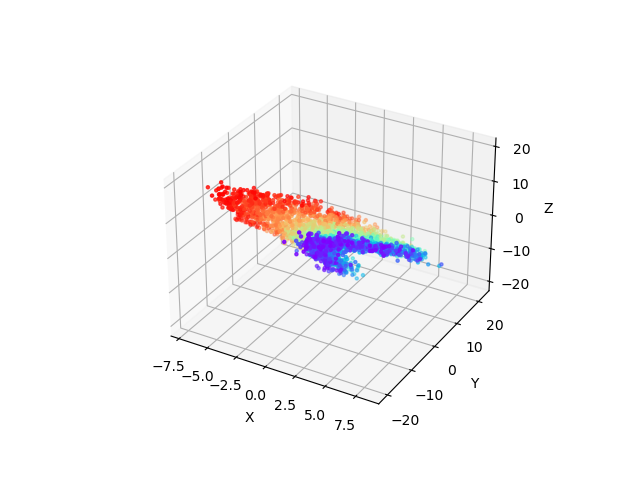

In [65]:
a,u,v = get_silla(3000, 3, 0.5)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a[:,0], a[:,1], a[:,2], s=5, c=v, cmap="rainbow")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

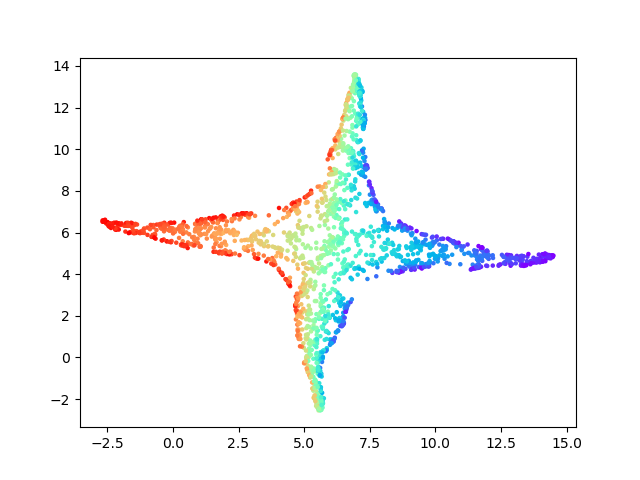

In [66]:
a,u,v = get_silla(2000, 5)

reducer = umap.UMAP(n_components=2, n_neighbors=200)

emb = reducer.fit_transform(a)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(emb[:,0], emb[:,1], s=5, c=v, cmap="rainbow")

plt.show()

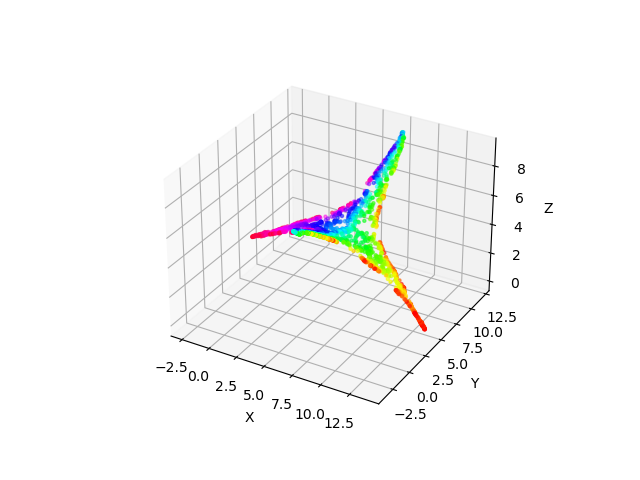

In [67]:
reducer = umap.UMAP(n_components=3, n_neighbors=100)

emb = reducer.fit_transform(a)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(emb[:,0], emb[:,1], emb[:,2], s=5, c=v, cmap="hsv")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [ ]:
get_silla(num_points, dims, std=0.1)

In [34]:
NUM_POINTS = [1000, 4000, 10000, 40000]
DIMS = [3, 8, 16, 32]
STD = [0.1, 1]

rng = default_rng(1234)

In [35]:
df = pd.DataFrame(columns=["num_points", "dims", "std"],
                 data=product(NUM_POINTS, DIMS, STD))
df.to_csv("synth_data_gen/synth_datasets/punto_silla/params.csv", index=False)

In [36]:
df = pd.read_csv("synth_data_gen/synth_datasets/punto_silla/params.csv")

for idx in df.index:
    params = df.loc[idx,:].to_dict()
    
    points, u, v = get_silla(**params)
    out = {"data": points, "u": u, "v": v}
    
    with open(f'synth_data_gen/synth_datasets/punto_silla/set_{idx}.pickle', 'wb') as handle:
        pickle.dump(out, handle, protocol=pickle.HIGHEST_PROTOCOL)
    #np.save(f"synth_data_gen/synth_datasets_2d/punto_silla/points_{idx}.npy", points)
    #np.save(f"synth_data_gen/synth_datasets_2d/punto_silla/u_{idx}.npy", u)
    #np.save(f"synth_data_gen/synth_datasets_2d/punto_silla/v_{idx}.npy", v)
    

# Swiss roll

In [40]:
def get_swiss_roll(num_points, dims, noise=0.1, random_state=1234, hole=False):
    points, sample = make_swiss_roll(n_samples=num_points, noise=noise,
                            random_state=random_state, hole=hole)
    
    
    newpoints = np.zeros((num_points, dims))
    newpoints[:, :3] = points.copy()
    
    rng = default_rng(random_state)
    
    if dims > 3:
        newpoints[:, 3:] = rng.multivariate_normal(mean=(dims-3)*[0],cov=noise**2 * np.eye(dims-3),
                                                                        size=num_points)
    
    rotation_matrix = special_ortho_group(dim=dims, seed=random_state).rvs(1)

    newpoints = np.matmul(newpoints, rotation_matrix)
    
    return newpoints, sample
    
    


In [41]:
points, sample = get_swiss_roll(num_points=5000, dims=3, noise=1, random_state=12, hole=True)

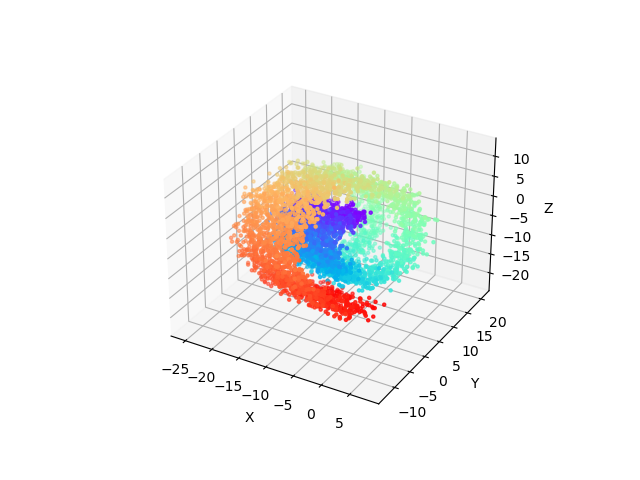

In [42]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2], s=5, c=sample, cmap="rainbow")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [75]:
points, sample = get_swiss_roll(num_points=5000, dims=5, noise=1, random_state=12, hole=False)

In [43]:
NUM_POINTS = [1000, 4000, 10000, 40000]
DIMS = [3, 8, 16, 32]
STD = [0.1, 1]
HOLE = [True, False]

rng = default_rng(1234)

In [48]:
df = pd.DataFrame(columns=["num_points", "dims", "noise", "hole"],
                 data=product(NUM_POINTS, DIMS, STD, HOLE))
df.to_csv("synth_data_gen/synth_datasets/swiss_roll/params.csv", index=False)

In [51]:
df = pd.read_csv("synth_data_gen/synth_datasets/swiss_roll/params.csv")

for idx in df.index:
    params = df.loc[idx,:].to_dict()
    
    points, sample = get_swiss_roll(**params)
    out = {"data": points, "sample": sample}
    
    with open(f'synth_data_gen/synth_datasets/swiss_roll/set_{idx}.pickle', 'wb') as handle:
        pickle.dump(out, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
    #np.save(f"synth_data_gen/synth_datasets_2d/punto_silla/points_{idx}.npy", points)
    #np.save(f"synth_data_gen/synth_datasets_2d/punto_silla/u_{idx}.npy", u)
    #np.save(f"synth_data_gen/synth_datasets_2d/punto_silla/v_{idx}.npy", v)
    

# Torus

In [52]:
def torus(u, v):
    u = 2*np.pi*u
    v = 2*np.pi*v
    
    x = 4*np.cos(u)
    y = 4*np.sin(u)
    z = 4*np.cos(v)
    w = 4*np.sin(v)
    
    return x,y,z,w

In [58]:
def get_torus(num_points, dims, std=0.1, rng=33):
    assert dims >= 4
    num_points = int(num_points)
    dims = int(dims)
    
    rng = default_rng(rng)
    u = rng.uniform(size=num_points)
    v = rng.uniform(size=num_points)

    x, y, z, w = torus(u, v)
    
    points = np.zeros((num_points, dims))
    points[:,0] = x
    points[:,1] = y
    points[:,2] = z
    points[:,3] = w

    noise = rng.multivariate_normal(mean=dims*[0], cov=std*np.eye(dims), size=points.shape[0])
    points += noise
    
    rotation_matrix = special_ortho_group(dim=dims, seed=rng).rvs(1)

    points = np.matmul(points, rotation_matrix)
    
    return points, u, v

a, u, v = get_torus(num_points=10000, dims=4, std=0.1)

In [100]:
emb = umap.UMAP(n_components=3, n_neighbors=500).fit_transform(a)

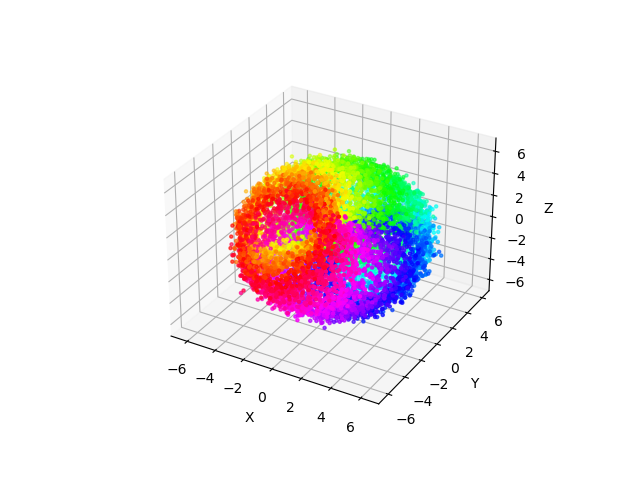

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a[:,0], a[:,2], a[:,3], s=5, c=v, cmap="hsv")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

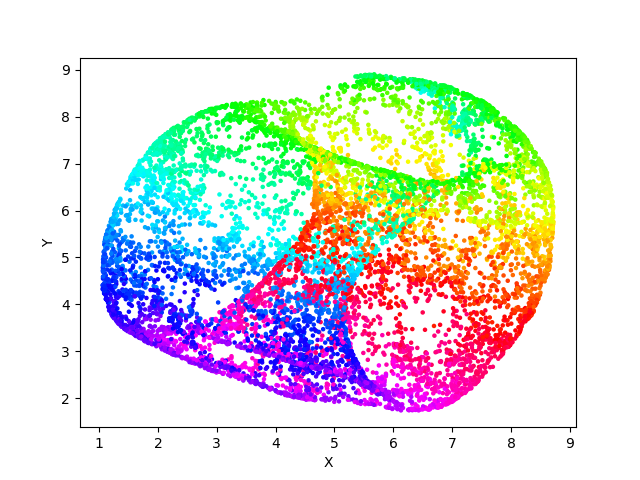

In [105]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(emb[:,0], emb[:,1], s=5, c=u, cmap="hsv")
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

In [53]:
NUM_POINTS = [1000, 4000, 10000, 40000]
DIMS = [4]
STD = [0.1, 1]

rng = default_rng(1234)

In [ ]:
a, u, v = get_torus(num_points=10000, dims=4, std=0.1, rng=rng)

In [56]:
df = pd.DataFrame(columns= ["num_points", "dims", "std"],
                 data=product(NUM_POINTS, DIMS, STD))
df.to_csv("synth_data_gen/synth_datasets/torus/params.csv", index=False)

In [60]:
df = pd.read_csv("synth_data_gen/synth_datasets/torus/params.csv")

for idx in df.index:
    params = df.loc[idx,:].to_dict()
    
    points, u, v = get_torus(**params)
    out = {"data": points, "u": u, "v":v}
    
    with open(f'synth_data_gen/synth_datasets/torus/set_{idx}.pickle', 'wb') as handle:
        pickle.dump(out, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
    #np.save(f"synth_data_gen/synth_datasets_2d/punto_silla/points_{idx}.npy", points)
    #np.save(f"synth_data_gen/synth_datasets_2d/punto_silla/u_{idx}.npy", u)
    #np.save(f"synth_data_gen/synth_datasets_2d/punto_silla/v_{idx}.npy", v)
    

https://www.youtube.com/watch?v=oVryLr9rm8E

# Sphere

In [47]:
def sphere(u, v, r=3):
    u = 2 * np.pi * u
    v = np.pi * v
    
    x = r * np.cos(u) * np.sin(v)
    y = r * np.sin(u) * np.sin(v)
    z = r * np.cos(v)
    
    return x, y, z


def get_sphere(num_points, dims, std=0.1, radius=3, rng=9876):
    assert dims >= 3
    num_points = int(num_points)
    dims = int(dims)
    
    rng = default_rng(rng)
    u = rng.uniform(size=num_points)
    v = rng.uniform(size=num_points)

    x, y, z = sphere(u, v, r=radius)
    
    points = np.zeros((num_points, dims))
    points[:,0] = x
    points[:,1] = y
    points[:,2] = z

    noise = rng.multivariate_normal(mean=dims*[0], cov=std*np.eye(dims), size=points.shape[0])
    points += noise
    
    rotation_matrix = special_ortho_group(dim=dims, seed=rng).rvs(1)

    points = np.matmul(points, rotation_matrix)
    
    return points, u, v

def get_sphere_unif(num_points, dims, std=0.1, radius=3, rng=9876):
    assert dims >= 3
    num_points = int(num_points)
    dims = int(dims)
    
    rng = default_rng(rng)
    rng = default_rng(33)
    sample = rng.normal(size=(num_points,3))
    sample = radius * sample / np.linalg.norm(sample, axis=1).reshape((-1,1))
    
    points = np.zeros((num_points, dims))
    points[:,0] = sample[:,0]
    points[:,1] = sample[:,1]
    points[:,2] = sample[:,2]

    noise = rng.multivariate_normal(mean=dims*[0], cov=std*np.eye(dims), size=points.shape[0])
    points += noise
    
    rotation_matrix = special_ortho_group(dim=dims, seed=rng).rvs(1)

    points = np.matmul(points, rotation_matrix)
    
    return points

a, u, v = get_sphere(num_points=1000, dims=3, std=0.1)


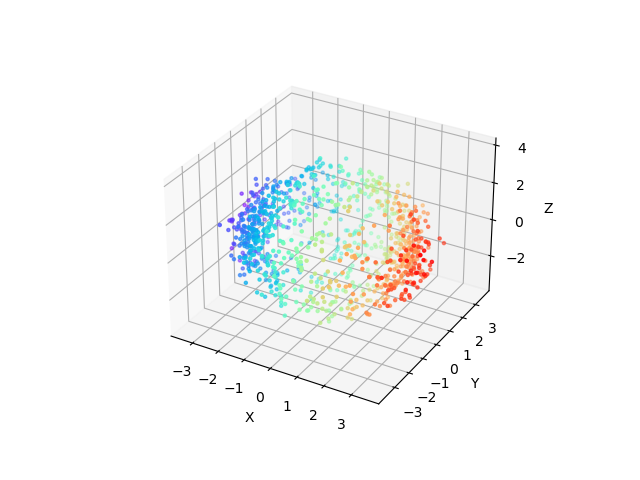

In [48]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a[:,0], a[:,1], a[:,2], s=5, c=a[:,0], cmap="rainbow")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

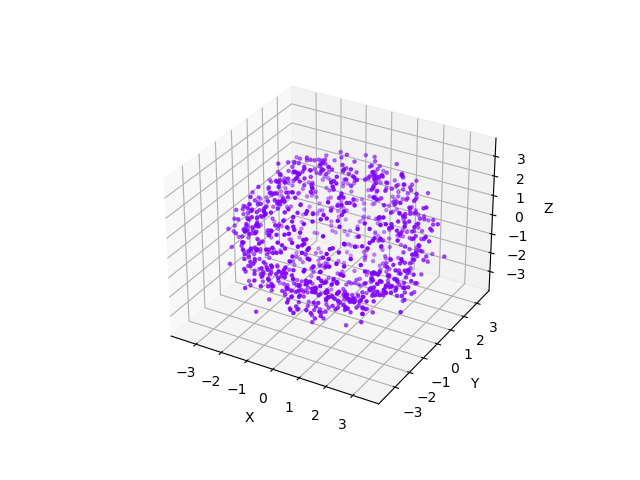

In [50]:
b = get_sphere_unif(num_points=1000, dims=3, std=0.1)


%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(b[:,0], b[:,1], b[:,2], s=5, c=[0 for _ in range(b.shape[0])], cmap="rainbow")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [54]:
NUM_POINTS = [1000, 4000, 10000, 40000]
DIMS = [8, 16, 32]
STD = [0.1, 1]

rng = default_rng(7890)

df = pd.DataFrame(columns= ["num_points", "dims", "std"],
                 data=product(NUM_POINTS, DIMS, STD))
df.to_csv("synth_data_gen/synth_datasets/sphere/params.csv", index=False)
df.to_csv("synth_data_gen/synth_datasets/sphere_unif/params.csv", index=False)

In [55]:
df = pd.read_csv("synth_data_gen/synth_datasets/sphere/params.csv")

for idx in df.index:
    params = df.loc[idx,:].to_dict()
    
    points, u, v = get_sphere(**params, rng=rng)
    out = {"data": points, "u": u, "v":v}
    
    with open(f'synth_data_gen/synth_datasets/sphere/set_{idx}.pickle', 'wb') as handle:
        pickle.dump(out, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
df = pd.read_csv("synth_data_gen/synth_datasets/sphere_unif/params.csv")

for idx in df.index:
    params = df.loc[idx,:].to_dict()
    
    points = get_sphere_unif(**params, rng=rng)
    out = {"data": points}
    
    with open(f'synth_data_gen/synth_datasets/sphere_unif/set_{idx}.pickle', 'wb') as handle:
        pickle.dump(out, handle, protocol=pickle.HIGHEST_PROTOCOL)